In [1]:
'''from pathlib import Path
import pandas as pd

# 🔧 1) Point this at your folder of Excel files
folder = Path("/Users/kilian_1/Library/CloudStorage/OneDrive-City,UniversityofLondon/Desktop/Applied Machine Learning/Applied-ML-Github-Repo/tweet_market_impact.xlsx")

# 🔧 2) Name (and location) of the merged workbook
out_file = folder.parent / "merged_tweets.xlsx"

# ---------------------------------------------------------------------
frames = []
for f in folder.glob("*_tweets.xlsx"):
    if f.name.startswith("~$"):          # skip Office lock files
        continue
    df = pd.read_excel(f)
    df["author"] = f.stem.replace("_tweets", "")
    frames.append(df)

if not frames:
    raise RuntimeError(f"No *_tweets.xlsx files found in {folder}")

merged = pd.concat(frames, ignore_index=True)
merged.to_excel(out_file, index=False)
print(f"✅  Saved {len(merged):,} rows → {out_file}")'''


'from pathlib import Path\nimport pandas as pd\n\n# 🔧 1) Point this at your folder of Excel files\nfolder = Path("/Users/kilian_1/Library/CloudStorage/OneDrive-City,UniversityofLondon/Desktop/Applied Machine Learning/Applied-ML-Github-Repo/tweet_market_impact.xlsx")\n\n# 🔧 2) Name (and location) of the merged workbook\nout_file = folder.parent / "merged_tweets.xlsx"\n\n# ---------------------------------------------------------------------\nframes = []\nfor f in folder.glob("*_tweets.xlsx"):\n    if f.name.startswith("~$"):          # skip Office lock files\n        continue\n    df = pd.read_excel(f)\n    df["author"] = f.stem.replace("_tweets", "")\n    frames.append(df)\n\nif not frames:\n    raise RuntimeError(f"No *_tweets.xlsx files found in {folder}")\n\nmerged = pd.concat(frames, ignore_index=True)\nmerged.to_excel(out_file, index=False)\nprint(f"✅  Saved {len(merged):,} rows → {out_file}")'

In [2]:
import pandas as pd
df = pd.read_excel("/Users/kilian_1/Library/CloudStorage/OneDrive-City,UniversityofLondon/Desktop/Applied Machine Learning/Applied-ML-Github-Repo/tweet_market_impact.xlsx")

print(df.head(5))

   tweet_ID           Timestamp             Twitter_acc  \
0     12635 2025-06-21 19:52:00  TrumpDailyPosts_tweets   
1     10724 2025-06-21 19:47:00  TrumpDailyPosts_tweets   
2       982 2025-06-21 18:35:00  TrumpDailyPosts_tweets   
3     12425 2025-06-21 18:25:00  TrumpDailyPosts_tweets   
4      4099 2025-06-21 18:06:00  TrumpDailyPosts_tweets   

                                               Tweet  Mid_Open_Execution  \
0  Donald J. Trump Truth Social 06.21.25 03:21 PM...               75.07   
1  Donald J. Trump Truth Social 06.21.25 03:21 PM...               75.07   
2                                          TAKE POLL               75.07   
3                                          TAKE POLL               75.07   
4  Donald J. Trump Truth Social 06.20.25 06:34 PM...               75.07   

   Execution_Delayed  MI_1min_MidOpen  MI_1min_MidClose  MI_5min_MidOpen  \
0               True              NaN               NaN              NaN   
1               True              Na

In [3]:
import nltk
nltk.download('stopwords') #stopwords – a list of very common English words ( the, is, and …) you usually ignore.
nltk.download('wordnet') #wordnet – a huge English dictionary that helps with tasks like turning “cars” → “car”.
 
# Initialize lemmatizer
from nltk.stem import WordNetLemmatizer # shrinks words to their base form
lemmatizer = WordNetLemmatizer() # the ignore-these words list

# Define stop words
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))

# Function to handle negations
#What it looks for: any of those common negative words (never, no, not, can’t, didn’t, etc.).
#What it does when it finds one: appends "_NEG" to it.
import re
def handle_negations(text):
    negations_pattern = re.compile(r'\b(?:never|no|nothing|nowhere|noone|none|not|havent|hasnt|hadnt|cant|couldnt|shouldnt|wont|wouldnt|dont|doesnt|didnt|isnt|arent|aint)\b')
    text = negations_pattern.sub(lambda x: x.group() + '_NEG', text)
    return text

# Contractions dictionary
contractions_dict = {"can't": "cannot", "won't": "will not", "it's": "it is", "i'm": "i am"}

# Function to expand contractions
def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) if contractions_dict.get(match) else contractions_dict.get(match.lower())
        expanded_contraction = first_char + expanded_contraction[1:]
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    return expanded_text
# Function to preprocess the text
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Handle negations
    text = handle_negations(text)
    
    # Expand contractions
    text = expand_contractions(text, contractions_dict)
    
    # Remove punctuation
    text = ''.join([c for c in text if c not in ('!', '.', ':', ',', '?', '(', ')', '"')])
    
    # Tokenize words
    words = text.split()
    
    # Remove stopwords, lemmatize, and remove standalone 's' and 'u'
    filtered_words = [
        lemmatizer.lemmatize(word)
        for word in words
        if word not in stop_words and word not in ('s', 'u')  # 🔥 This removes "s" and "u"
    ]
    
    return ' '.join(filtered_words)



# Preprocess the 'text' column
df["Tweet"] = df["Tweet"].fillna("").astype(str)
df['Tweet_processed'] = df['Tweet'].apply(preprocess_text)

df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kilian_1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kilian_1/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


KeyboardInterrupt: 

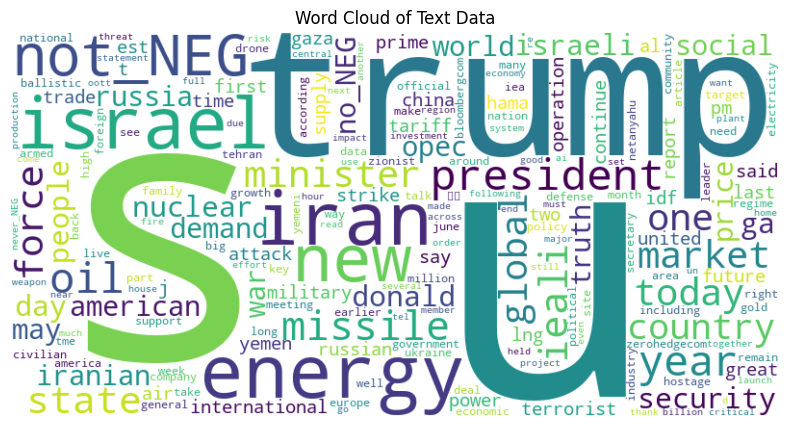

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text data into a single string
text_data = ' '.join(df['Tweet_processed'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Text Data')
plt.axis('off')
plt.show()

In [ ]:
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Simple stopwords list
custom_stopwords = set([
    'a', 'an', 'and', 'are', 'as', 'at', 'be', 'by', 'for', 'from',
    'has', 'he', 'in', 'is', 'it', 'its', 'of', 'on', 'that', 'the',
    'to', 'was', 'were', 'will', 'with', 'you', 'i', 'we', 'this'
])

# Preprocessing function without nltk dependencies
def simple_preprocess(text):
    text = text.lower()
    text = ''.join(c for c in text if c not in string.punctuation)
    words = text.split()
    words = [w for w in words if w not in custom_stopwords]
    return ' '.join(words)

# Apply simple preprocessing
df["Tweet_processed"] = df["Tweet"].fillna("").astype(str).apply(simple_preprocess)

# Drop rows where the target is NaN
df_model = df.dropna(subset=["MI_1min_MidOpen"])

# Feature extraction: TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=1000)
X_text = tfidf.fit_transform(df_model["Tweet_processed"])

# Target variable
y = df_model["MI_1min_MidOpen"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# Baseline model: Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rmse, mae, r2


(np.float64(122.93639603177748), 59.9649606879804, 0.09445190776375323)

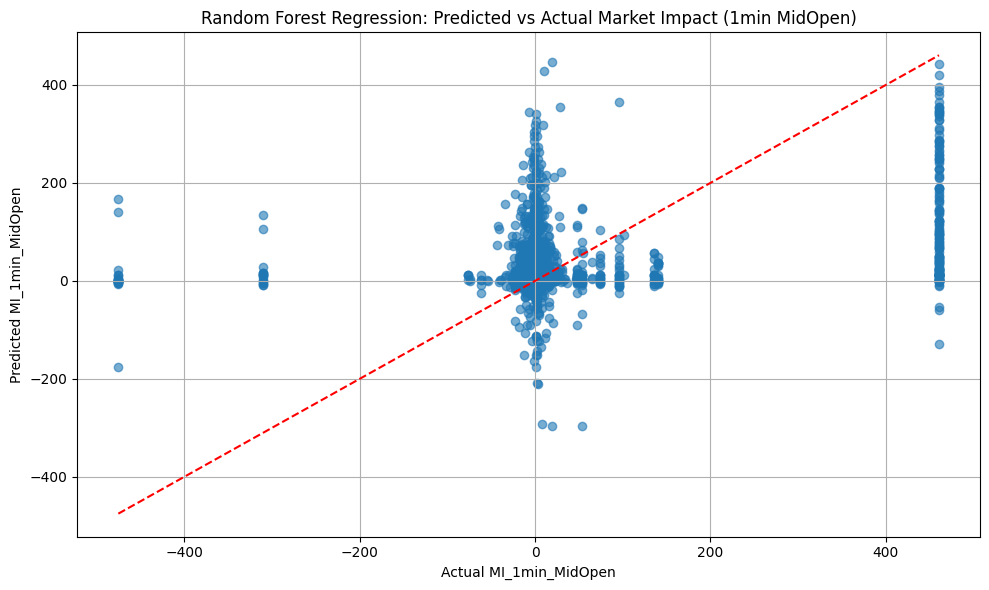

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot: true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # y = x line
plt.xlabel("Actual MI_1min_MidOpen")
plt.ylabel("Predicted MI_1min_MidOpen")
plt.title("Random Forest Regression: Predicted vs Actual Market Impact (1min MidOpen)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# List of all MI columns to loop over
target_columns = [col for col in df.columns if col.startswith("MI_")]

# Dictionary to store results
results = {}

# Preprocess tweets
df["Tweet_processed"] = df["Tweet"].fillna("").astype(str).apply(simple_preprocess)

# TF-IDF once, reused for all models
tfidf = TfidfVectorizer(max_features=1000)
X_text = tfidf.fit_transform(df["Tweet_processed"])

# Loop through each MI column
for target in target_columns:
    df_model = df.dropna(subset=[target])
    if df_model.shape[0] < 100:  # skip if not enough samples
        continue
    
    X = X_text[df_model.index]
    y = df_model[target].values

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model
    model = RandomForestRegressor(n_estimators=50, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[target] = {"RMSE": rmse, "MAE": mae, "R2": r2}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T.sort_index()


In [ ]:
print(results_df)

                         RMSE         MAE        R2
MI_12h_MidClose    219.415934  154.416943 -0.035080
MI_12h_MidOpen     219.705948  154.080331 -0.033310
MI_15min_MidClose   90.860346   53.494198 -0.020932
MI_15min_MidOpen    90.188008   52.795443 -0.012706
MI_1d_MidClose     282.715747  210.715834 -0.004012
MI_1d_MidOpen      281.083334  208.583373 -0.004898
MI_1h_MidClose     100.272952   64.279330  0.026036
MI_1h_MidOpen       99.487076   63.801603  0.017394
MI_1min_MidClose   125.881177   62.977764  0.075094
MI_1min_MidOpen    123.374195   60.400034  0.087991
MI_2d_MidClose     364.086495  255.220085  0.083908
MI_2d_MidOpen      360.131354  253.313420  0.097936
MI_2h_MidClose     112.794197   74.965006 -0.013041
MI_2h_MidOpen      115.613709   77.093293 -0.005343
MI_30min_MidClose   98.698691   59.384683  0.014746
MI_30min_MidOpen    97.613652   58.301958  0.012599
MI_3d_MidClose     456.761853  320.327595  0.039187
MI_3d_MidOpen      455.363702  318.987995  0.045420
MI_4d_MidClo

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Preprocessing (reuse your simple_preprocess function)
df["Tweet_processed"] = df["Tweet"].fillna("").astype(str).apply(simple_preprocess)

# Drop NA targets
target_col = "MI_1min_MidOpen"
df_model = df.dropna(subset=[target_col])

# Features and labels
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df_model["Tweet_processed"])
y = df_model[target_col].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print("XGBoost R²:", r2_score(y_test, y_pred))


XGBoost R²: 0.10866861998117416


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import numpy as np
import pandas as pd

# Reuse the previously loaded DataFrame: df

# Simple text preprocessing
import string
def simple_preprocess(text):
    text = text.lower()
    text = ''.join(c for c in text if c not in string.punctuation)
    words = text.split()
    stopwords = set([
        'a', 'an', 'and', 'are', 'as', 'at', 'be', 'by', 'for', 'from',
        'has', 'he', 'in', 'is', 'it', 'its', 'of', 'on', 'that', 'the',
        'to', 'was', 'were', 'will', 'with', 'you', 'i', 'we', 'this'
    ])
    words = [w for w in words if w not in stopwords]
    return ' '.join(words)

# Preprocess text
df["Tweet_processed"] = df["Tweet"].fillna("").astype(str).apply(simple_preprocess)

# Identify target columns
target_columns = [col for col in df.columns if col.startswith("MI_")]

# TF-IDF vectorization (fit once)
tfidf = TfidfVectorizer(max_features=1000)
X_text = tfidf.fit_transform(df["Tweet_processed"])

# Store results
results = {}

for target in target_columns:
    df_model = df.dropna(subset=[target])
    if df_model.shape[0] < 100:
        continue

    X = X_text[df_model.index]
    y = df_model[target].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[target] = {"RMSE": rmse, "MAE": mae, "R2": r2}

# Convert results to DataFrame
results_df2 = pd.DataFrame(results).T.sort_index()



In [ ]:
print(results_df2)

                         RMSE         MAE        R2
MI_12h_MidClose    214.889824  150.094847  0.007183
MI_12h_MidOpen     215.021074  149.873988  0.010287
MI_15min_MidClose   87.148646   48.069256  0.060776
MI_15min_MidOpen    86.961137   47.995355  0.058465
MI_1d_MidClose     278.743628  207.165529  0.024002
MI_1d_MidOpen      277.243707  206.104498  0.022368
MI_1h_MidClose      99.076367   61.535948  0.049143
MI_1h_MidOpen       98.147680   60.625374  0.043673
MI_1min_MidClose   123.932087   60.308885  0.103514
MI_1min_MidOpen    122.227941   58.003500  0.104859
MI_2d_MidClose     360.946572  252.597971  0.099641
MI_2d_MidOpen      358.676703  252.266969  0.105209
MI_2h_MidClose     109.740910   70.856932  0.041062
MI_2h_MidOpen      111.982892   72.613740  0.056810
MI_30min_MidClose   96.966974   56.041859  0.049016
MI_30min_MidOpen    95.966189   55.003147  0.045647
MI_3d_MidClose     448.194818  308.879960  0.074891
MI_3d_MidOpen      447.888685  308.366323  0.076502
MI_4d_MidClo

In [ ]:
import lightgbm as lgb

# Same preprocessing and TF-IDF as above
df["Tweet_processed"] = df["Tweet"].fillna("").astype(str).apply(simple_preprocess)
df_model = df.dropna(subset=[target_col])
X = tfidf.fit_transform(df_model["Tweet_processed"])
y = df_model[target_col].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM model
model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, num_leaves=31, random_state=42)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print("LightGBM R²:", r2_score(y_test, y_pred))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37539
[LightGBM] [Info] Number of data points in the train set: 9396, number of used features: 999
[LightGBM] [Info] Start training from score 26.655246
LightGBM R²: 0.08302328193584507


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from torch.utils.data import DataLoader, TensorDataset
from torch.nn.utils.rnn import pad_sequence
from collections import Counter
import re

# Tokenizer and Preprocessing
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Build vocabulary
counter = Counter()
for tweet in df["Tweet_processed"]:
    counter.update(tokenize(tweet))

vocab = {word: i+2 for i, (word, _) in enumerate(counter.most_common(5000))}
vocab["<PAD>"] = 0
vocab["<OOV>"] = 1

# Encode tweets
def encode(text):
    return [vocab.get(word, 1) for word in tokenize(text)]

encoded = [torch.tensor(encode(tweet)) for tweet in df["Tweet_processed"]]
padded = pad_sequence(encoded, batch_first=True, padding_value=0)
padded = padded[:, :50]  # Truncate to maxlen=50

# Filter valid targets
target_col = "MI_1min_MidOpen"
df_model = df.dropna(subset=[target_col])
X = padded[df_model.index]
y = torch.tensor(df_model[target_col].values, dtype=torch.float32)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dataset & Dataloader
train_ds = TensorDataset(X_train, y_train)
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)

# Define Model
class TweetRegressor(nn.Module):
    def __init__(self, vocab_size, embed_dim):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.pool = nn.AdaptiveAvgPool1d(1)
        self.fc1 = nn.Linear(embed_dim, 64)
        self.dropout = nn.Dropout(0.3)
        self.out = nn.Linear(64, 1)

    def forward(self, x):
        x = self.embed(x).permute(0, 2, 1)  # (batch, embed_dim, seq_len)
        x = self.pool(x).squeeze(-1)        # (batch, embed_dim)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        return self.out(x).squeeze(-1)

# Instantiate model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TweetRegressor(vocab_size=len(vocab), embed_dim=64).to(device)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
model.train()
for epoch in range(10):
    for xb, yb in train_dl:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        pred = model(xb)
        loss = loss_fn(pred, yb)
        loss.backward()
        optimizer.step()

# Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test.to(device)).cpu().numpy()
    y_true = y_test.numpy()
    print("PyTorch NN R²:", r2_score(y_true, y_pred))


ModuleNotFoundError: No module named 'torch'